##  Homework 4 - Problem 1 : Convolutional networks for MNIST 


### Student: Dimitrios Tanoglidis


### Part a)

I will work using keras. I use as the "original model" that in the keras demo file.

In [10]:
#Import stuff
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical 

# Adjust rc parameters to make plots pretty
def plot_pretty(dpi=200, fontsize=9):
    
    import matplotlib.pyplot as plt

    plt.rc("savefig", dpi=dpi)       # dpi resolution of saved image files
    plt.rc('text', usetex=True)      # use LaTeX to process labels
    plt.rc('font', size=fontsize)    # fontsize
    plt.rc('xtick', direction='in')  # make axes ticks point inward
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=10) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=10) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [0.5, 1.1]) # fix dotted lines

    return

plot_pretty()

In [2]:
data_train = np.float64(np.load("/Users/Dimitris/Desktop/Machine_Learning/HW2/train_images.npy"))
data_test = np.float64(np.load("/Users/Dimitris/Desktop/Machine_Learning/HW2/test_images.npy"))
labels_train = np.float32(np.load("/Users/Dimitris/Desktop/Machine_Learning/HW2/train_labels.npy"))
labels_test = np.float32(np.load("/Users/Dimitris/Desktop/Machine_Learning/HW2/test_labels.npy"))


# Concatenate
X = (np.concatenate((data_train,data_test))).reshape(-1,28,28,1).astype(np.float64) / 255.
Y = to_categorical(np.concatenate((labels_train,labels_test)))

# Split in train, validation, test set
train_set = (X[:50000], Y[:50000])
val_set = (X[50000:60000], Y[50000:60000])
test_set = (X[60000:70000], Y[60000:70000])

# Get a subsample of the training set to make it fast /keep 20000 samples
train_fast = (X[:20000], Y[:20000])

In [3]:
# build the  original model
model = keras.models.Sequential()
model.add(keras.layers.InputLayer((28,28,1)))
model.add(keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Dropout(rate=0.4))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Dropout(rate=0.4))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=1024, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))
model.compile(optimizer=tf.train.AdadeltaOptimizer(0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.fit(x=train_set[0], y=train_set[1],
          epochs=18, batch_size=16,
          shuffle=True,
          validation_data=val_set)

Train on 50000 samples, validate on 10000 samples
Epoch 1/18
50000/50000 [==============================] - 93s 2ms/step - loss: 0.1127 - acc: 0.9646 - val_loss: 0.0726 - val_acc: 0.9799
Epoch 2/18
50000/50000 [==============================] - 93s 2ms/step - loss: 0.1101 - acc: 0.9650 - val_loss: 0.0697 - val_acc: 0.9799
Epoch 3/18
50000/50000 [==============================] - 88s 2ms/step - loss: 0.1069 - acc: 0.9663 - val_loss: 0.0671 - val_acc: 0.9813
Epoch 4/18
50000/50000 [==============================] - 94s 2ms/step - loss: 0.1015 - acc: 0.9671 - val_loss: 0.0661 - val_acc: 0.9803
Epoch 5/18
50000/50000 [==============================] - 128s 3ms/step - loss: 0.1013 - acc: 0.9682 - val_loss: 0.0640 - val_acc: 0.9810
Epoch 6/18
50000/50000 [==============================] - 94s 2ms/step - loss: 0.0989 - acc: 0.9690 - val_loss: 0.0629 - val_acc: 0.9827
Epoch 7/18
50000/50000 [==============================] - 92s 2ms/step - loss: 0.0949 - acc: 0.9699 - val_loss: 0.0611 - val_ac

In [5]:
model.evaluate(test_set[0], test_set[1])

10000/10000 [==============================] - 3s 332us/step


[0.06830846932101994, 0.9785]

Printing the model summary below, we can see the number of parameters at each layer.
However, let's try to explain where these numbers come from.

In the first convolutional layers (covn2d) we have 16 filters of size $(3 \times 3)$. The total number of parameters learned in that layer is thus (including one bias parameter per filter):

\begin{equation}
(3 \times 3 + 1)\times 16  = 160
\end{equation}

For the second convolutional layer, we have to take into account that we have as input 16 filters from the first layer
now the second layer has 32 filters, thus:

\begin{equation}
(3 \times 3 \times 16 + 1)\times 32  = 4640
\end{equation}

For the first dense (fully connected layer) we have as iput 1568 parameters (the output for the flattening layer), plus one bias parameter and output 1024 parameters. So, total number of learned parameters:

\begin{equation}
(1568 + 1)\times 1024 = 1606656 
\end{equation}

For the last dense layer, we have as input 1024 parameters and output 10, thus the total number of learned parameters (including one bias) is:

\begin{equation}
(1024+1)\times 10 = 10250
\end{equation}

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
__________

Let's now plot the error rate, defined as $1 - accuracy$, for the training and validation samples.

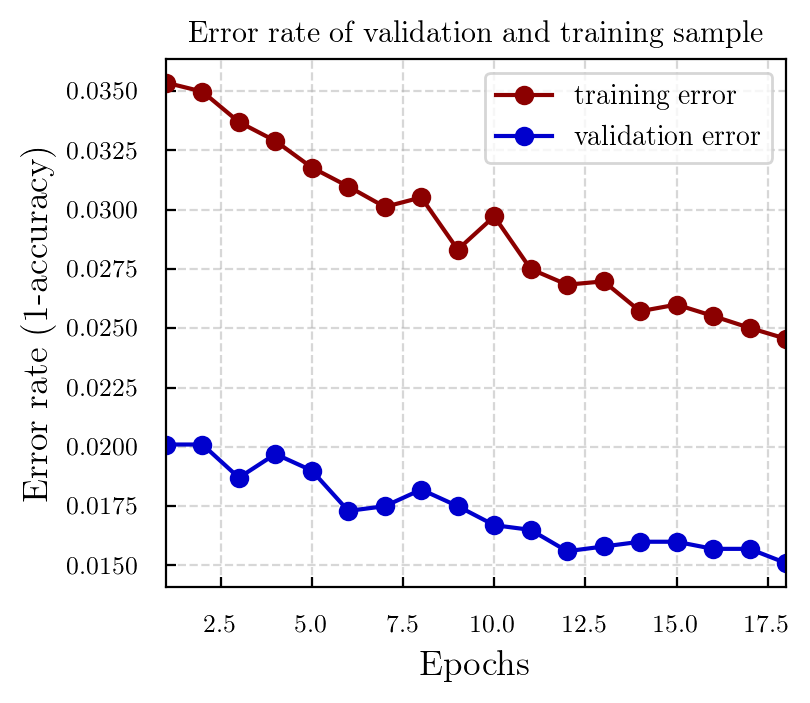

In [31]:
Epochs = np.arange(1,19,1)
history_dict = model.history.history

train_acc = history_dict['acc']
test_acc = history_dict['val_acc']
train_err = 1.0 - np.asarray(train_acc)
test_err = 1.0 - np.asarray(test_acc)

plt.figure(figsize=(4, 3.5))

plt.plot(Epochs, train_err, c = 'darkred', marker='o',label='training error')
plt.plot(Epochs, test_err , c = 'mediumblue', marker='o', label='validation error')

plt.grid(ls='--',alpha=0.5)
plt.xlabel('Epochs', fontsize=13);plt.ylabel('Error rate (1-accuracy)',fontsize=13)
plt.title('Error rate of validation and training sample')
plt.xlim(1,18)

plt.legend(frameon=True, loc='upper right', fontsize=10)
plt.show()

Let's now show an image of the images estimated in the first layer of the model.

For this I used parts of the code that can be found in the book "Deep learning in Python" by Francois Chollet.

In [107]:
from tensorflow.keras import backend as K

In [108]:
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255.
    x = np.clip(x, 0 , 255).astype(np.float64)
    return x

In [109]:
def generate_pattern(layer_name, filter_index, size=28):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:,:,:,filter_index])
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    
    iterate = K.function([model.input],[loss,grads])
    input_img_data = np.random.random((1,size,size,1))*20 + 128.
    
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value*step
        
    img = input_img_data[0]
    return deprocess_image(img)        

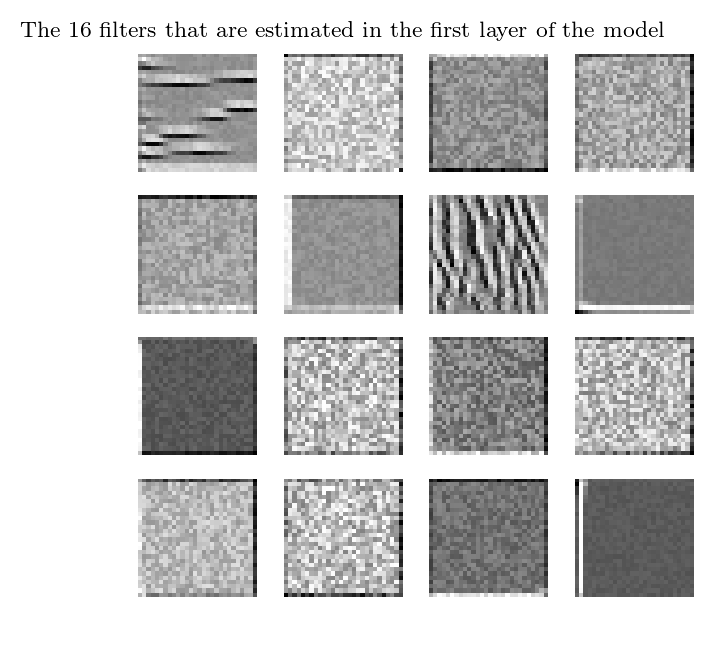

In [122]:
nrows = 4
ncols = 4

plt.figure(figsize=(ncols*0.9, nrows*0.9))
for i in range(nrows*ncols):
    if (i==2):
        plt.title('The 16 filters that are estimated in the first layer of the model', fontsize=8)
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(generate_pattern('conv2d',i).reshape((28,28)), cmap='gray')
    plt.axis('off')
       
plt.show()



### b) 

When experimenting with changing the parameters of the network, I will use a smaller training set of only 10000 training data and I will train only for 10 epochs.

To be able to compare fairly, let's first run the original model with these settings

In [123]:
train_fast = (X[:10000], Y[:10000])

model.fit(x=train_fast[0], y=train_fast[1],
          epochs=10, batch_size=16,
          shuffle=True,
          validation_data=val_set)

Train on 10000 samples, validate on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 17s 2ms/step - loss: 0.0758 - acc: 0.9767 - val_loss: 0.0529 - val_acc: 0.9847
Epoch 2/10
10000/10000 [==============================] - 16s 2ms/step - loss: 0.0737 - acc: 0.9779 - val_loss: 0.0523 - val_acc: 0.9848
Epoch 3/10
10000/10000 [==============================] - 16s 2ms/step - loss: 0.0703 - acc: 0.9793 - val_loss: 0.0527 - val_acc: 0.9840
Epoch 4/10
10000/10000 [==============================] - 16s 2ms/step - loss: 0.0719 - acc: 0.9766 - val_loss: 0.0508 - val_acc: 0.9859
Epoch 5/10
10000/10000 [==============================] - 16s 2ms/step - loss: 0.0714 - acc: 0.9790 - val_loss: 0.0519 - val_acc: 0.9848
Epoch 6/10
10000/10000 [==============================] - 16s 2ms/step - loss: 0.0687 - acc: 0.9782 - val_loss: 0.0508 - val_acc: 0.9851
Epoch 7/10
10000/10000 [==============================] - 20s 2ms/step - loss: 0.0681 - acc: 0.9767 - val_loss: 0.0524 - val_acc

In [124]:
model.evaluate(test_set[0], test_set[1])

10000/10000 [==============================] - 2s 238us/step


[0.04505763360289857, 0.9852]

- i) Now I will design two different networks, both with the same number of layers as the original model but in the first reducing the number of parameters by half and in the second doubling the number of parameters.

For (approximately) halving the parameters: - I half the number of filters in the second layer and of the units in the first dense layer.

In [128]:
# build the  original model
model_1 = keras.models.Sequential()
model_1.add(keras.layers.InputLayer((28,28,1)))
model_1.add(keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model_1.add(keras.layers.MaxPool2D())
model_1.add(keras.layers.Dropout(rate=0.4))
model_1.add(keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model_1.add(keras.layers.MaxPool2D())
model_1.add(keras.layers.Dropout(rate=0.4))
model_1.add(keras.layers.Flatten())
model_1.add(keras.layers.Dense(units=512, activation='relu'))
model_1.add(keras.layers.Dense(units=10, activation='softmax'))
model_1.compile(optimizer=tf.train.AdadeltaOptimizer(0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [129]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 16)        2320      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
__________

In [132]:
model_1.fit(x=train_fast[0], y=train_fast[1],
          epochs=10, batch_size=16,
          shuffle=True,
          validation_data=val_set)

Train on 10000 samples, validate on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 10s 1ms/step - loss: 0.3495 - acc: 0.8961 - val_loss: 0.2323 - val_acc: 0.9326
Epoch 2/10
10000/10000 [==============================] - 11s 1ms/step - loss: 0.3388 - acc: 0.8963 - val_loss: 0.2162 - val_acc: 0.9398
Epoch 3/10
10000/10000 [==============================] - 10s 1ms/step - loss: 0.3318 - acc: 0.8991 - val_loss: 0.2100 - val_acc: 0.9408
Epoch 4/10
10000/10000 [==============================] - 11s 1ms/step - loss: 0.3236 - acc: 0.9033 - val_loss: 0.2060 - val_acc: 0.9412
Epoch 5/10
10000/10000 [==============================] - 11s 1ms/step - loss: 0.3101 - acc: 0.9019 - val_loss: 0.1933 - val_acc: 0.9464
Epoch 6/10
10000/10000 [==============================] - 10s 1ms/step - loss: 0.3048 - acc: 0.9075 - val_loss: 0.1893 - val_acc: 0.9486
Epoch 7/10
10000/10000 [==============================] - 11s 1ms/step - loss: 0.2979 - acc: 0.9116 - val_loss: 0.1864 - val_acc

In [133]:
model_1.evaluate(test_set[0], test_set[1])

10000/10000 [==============================] - 2s 246us/step


[0.18430434758365155, 0.9479]

The accuracy in the testing set is $0.9479$.

Now I double the number of filters in the first convolutional layer and in the first dense layers. The architecture of the network is as follows:

In [134]:
# build the  second model now, with doubled parameters
model_2 = keras.models.Sequential()
model_2.add(keras.layers.InputLayer((28,28,1)))
model_2.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model_2.add(keras.layers.MaxPool2D())
model_2.add(keras.layers.Dropout(rate=0.4))
model_2.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model_2.add(keras.layers.MaxPool2D())
model_2.add(keras.layers.Dropout(rate=0.4))
model_2.add(keras.layers.Flatten())
model_2.add(keras.layers.Dense(units=2*1024, activation='relu'))
model_2.add(keras.layers.Dense(units=10, activation='softmax'))
model_2.compile(optimizer=tf.train.AdadeltaOptimizer(0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [135]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1568)              0         
__________

The model has over 3 million parameters. Let's train it and evaluate it on the test sample.

In [136]:
model_2.fit(x=train_fast[0], y=train_fast[1],
          epochs=10, batch_size=16,
          shuffle=True,
          validation_data=val_set)

Train on 10000 samples, validate on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 37s 4ms/step - loss: 1.2201 - acc: 0.6483 - val_loss: 0.4866 - val_acc: 0.8676
Epoch 2/10
10000/10000 [==============================] - 32s 3ms/step - loss: 0.5577 - acc: 0.8241 - val_loss: 0.3795 - val_acc: 0.8944
Epoch 3/10
10000/10000 [==============================] - 32s 3ms/step - loss: 0.4919 - acc: 0.8460 - val_loss: 0.3462 - val_acc: 0.8925
Epoch 4/10
10000/10000 [==============================] - 33s 3ms/step - loss: 0.4421 - acc: 0.8639 - val_loss: 0.3295 - val_acc: 0.8980
Epoch 5/10
10000/10000 [==============================] - 33s 3ms/step - loss: 0.4050 - acc: 0.8759 - val_loss: 0.2792 - val_acc: 0.9187
Epoch 6/10
10000/10000 [==============================] - 32s 3ms/step - loss: 0.3656 - acc: 0.8860 - val_loss: 0.2649 - val_acc: 0.9178
Epoch 7/10
10000/10000 [==============================] - 32s 3ms/step - loss: 0.3447 - acc: 0.8968 - val_loss: 0.2406 - val_acc

In [137]:
model_2.evaluate(test_set[0], test_set[1])

10000/10000 [==============================] - 5s 522us/step


[0.2070256902486086, 0.94]

The accuracy on the training set is 0.94, less than that of the previous model.

- Deeper Network. Here I add one more convolutional layer

In [148]:
# Build a deeper network
model_3 = keras.models.Sequential()
model_3.add(keras.layers.InputLayer((28,28,1)))
model_3.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model_3.add(keras.layers.MaxPool2D())
model_3.add(keras.layers.Dropout(rate=0.4))
model_3.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model_3.add(keras.layers.MaxPool2D())
model_3.add(keras.layers.Dropout(rate=0.4))
model_3.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model_3.add(keras.layers.MaxPool2D())
model_3.add(keras.layers.Dropout(rate=0.4))
model_3.add(keras.layers.Flatten())
model_3.add(keras.layers.Dense(units=3*1024, activation='relu'))
model_3.add(keras.layers.Dense(units=10, activation='softmax'))
model_3.compile(optimizer=tf.train.AdadeltaOptimizer(0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [149]:
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 7, 7, 64)          18496     
__________

In [150]:
model_3.fit(x=train_fast[0], y=train_fast[1],
          epochs=10, batch_size=16,
          shuffle=True,
          validation_data=val_set)

Train on 10000 samples, validate on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 36s 4ms/step - loss: 1.7637 - acc: 0.4122 - val_loss: 0.9479 - val_acc: 0.7505
Epoch 2/10
10000/10000 [==============================] - 29s 3ms/step - loss: 0.9964 - acc: 0.6658 - val_loss: 0.6621 - val_acc: 0.8159
Epoch 3/10
10000/10000 [==============================] - 30s 3ms/step - loss: 0.8394 - acc: 0.7208 - val_loss: 0.5463 - val_acc: 0.8524
Epoch 4/10
10000/10000 [==============================] - 26s 3ms/step - loss: 0.7430 - acc: 0.7566 - val_loss: 0.4958 - val_acc: 0.8546
Epoch 5/10
10000/10000 [==============================] - 35s 3ms/step - loss: 0.6743 - acc: 0.7810 - val_loss: 0.4306 - val_acc: 0.8638
Epoch 6/10
10000/10000 [==============================] - 28s 3ms/step - loss: 0.6069 - acc: 0.8033 - val_loss: 0.3576 - val_acc: 0.9016
Epoch 7/10
10000/10000 [==============================] - 25s 3ms/step - loss: 0.5544 - acc: 0.8194 - val_loss: 0.3173 - val_acc

In [152]:
model_3.evaluate(test_set[0], test_set[1])

10000/10000 [==============================] - 4s 449us/step


[0.24919179204702377, 0.9308]

The final accuracy is 0.9308. It seems that out of the three different models I tried here, the first one (the one htat has half of the number of the original parameters) gives the best results. Let's re-run it using the full training set.

In [153]:
model_1.fit(x=train_set[0], y=train_set[1],
          epochs=10, batch_size=16,
          shuffle=True,
          validation_data=val_set)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 39s 774us/step - loss: 0.2780 - acc: 0.9139 - val_loss: 0.1552 - val_acc: 0.9553
Epoch 2/10
50000/50000 [==============================] - 39s 788us/step - loss: 0.2498 - acc: 0.9219 - val_loss: 0.1380 - val_acc: 0.9607
Epoch 3/10
50000/50000 [==============================] - 40s 808us/step - loss: 0.2317 - acc: 0.9274 - val_loss: 0.1277 - val_acc: 0.9636
Epoch 4/10
50000/50000 [==============================] - 38s 766us/step - loss: 0.2155 - acc: 0.9328 - val_loss: 0.1169 - val_acc: 0.9674
Epoch 5/10
50000/50000 [==============================] - 47s 936us/step - loss: 0.2014 - acc: 0.9366 - val_loss: 0.1095 - val_acc: 0.9692
Epoch 6/10
50000/50000 [==============================] - 39s 787us/step - loss: 0.1890 - acc: 0.9401 - val_loss: 0.1059 - val_acc: 0.9696
Epoch 7/10
50000/50000 [==============================] - 38s 768us/step - loss: 0.1815 - acc: 0.9426 - val_loss: 0.

In [156]:
model_1.evaluate(test_set[0], test_set[1])

10000/10000 [==============================] - 2s 220us/step


[0.08579638557098807, 0.9726]

The accuracy (after 10 epochs) is $\sim 97.26 \%$.

Let's plot the error rate...

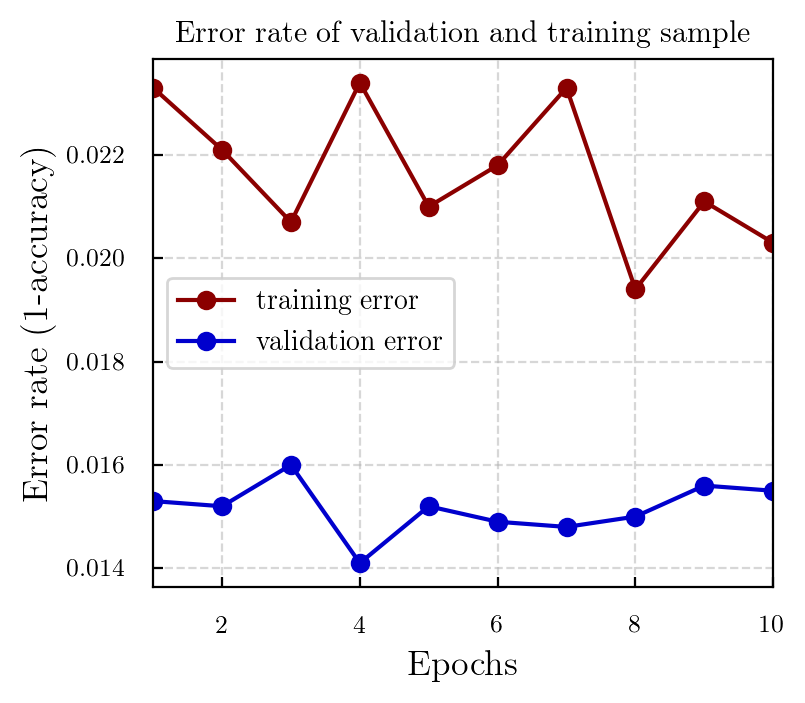

In [159]:
Epochs = np.arange(1,11,1)
history_dict = model.history.history

train_acc = history_dict['acc']
test_acc = history_dict['val_acc']
train_err = 1.0 - np.asarray(train_acc)
test_err = 1.0 - np.asarray(test_acc)

plt.figure(figsize=(4, 3.5))

plt.plot(Epochs, train_err, c = 'darkred', marker='o',label='training error')
plt.plot(Epochs, test_err , c = 'mediumblue', marker='o', label='validation error')

plt.grid(ls='--',alpha=0.5)
plt.xlabel('Epochs', fontsize=13);plt.ylabel('Error rate (1-accuracy)',fontsize=13)
plt.title('Error rate of validation and training sample')
plt.xlim(1,10)

plt.legend(frameon=True, loc='center left', fontsize=10)
plt.show()

### c) 

Import and reshape the transformed data


In [179]:
data_rotated = np.float64(np.load("/Users/Dimitris/Desktop/Machine_Learning/HW4/MNIST_TEST_TRANS.npy"))
X_rot = data_rotated.reshape(-1,28,28,1).astype(np.float64) / 255.

train_rot = (X_rot[:50000], Y[:50000])
val_rot = (X_rot[50000:60000], Y[50000:60000])
test_rot = (X_rot[60000:70000], Y[60000:70000])

Show some of the original data and transformed data

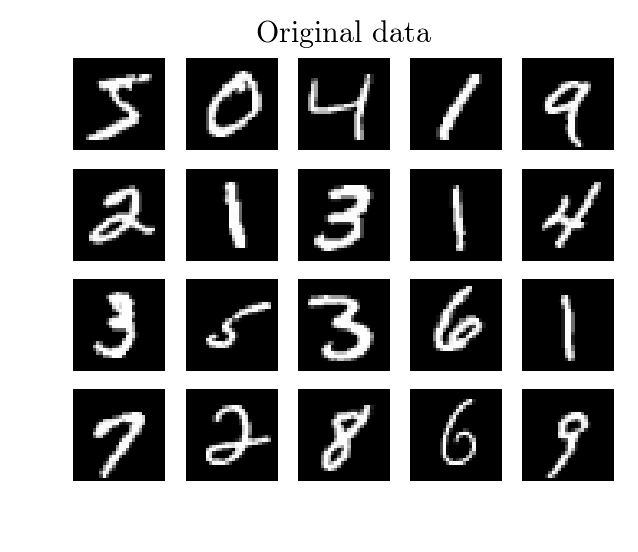

In [180]:
subset_or = data_train[0:20,:]/255.
subset_tr = data_rotated[0:20,:]/255.
nrows = 4
ncols = 5

plt.figure(figsize=(ncols*0.7, nrows*0.7))

for i in range(nrows*ncols):
    if (i==3):
        plt.title("Original data")
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(subset_or[i].reshape((28,28)), cmap='gray')
    plt.axis('off')
    
plt.axis('off')
plt.show()

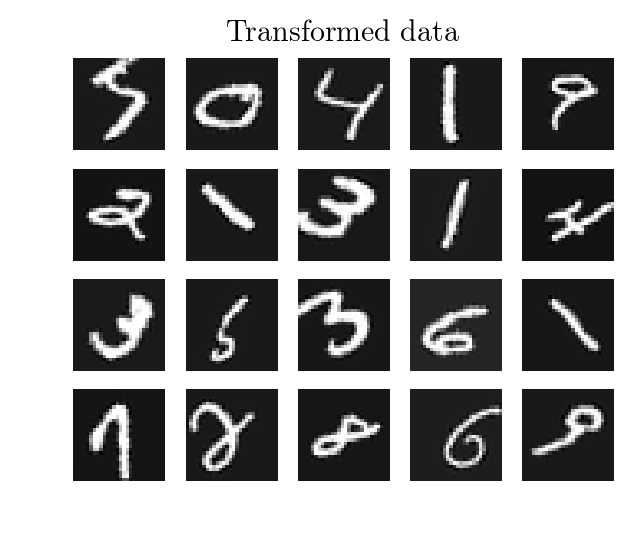

In [181]:
plt.figure(figsize=(ncols*0.7, nrows*0.7))

for i in range(nrows*ncols):
    if (i==3):
        plt.title("Transformed data")
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(subset_tr[i].reshape((28,28)), cmap='gray')
    plt.axis('off')
    
plt.axis('off')
plt.show()

Let's test on these data

In [182]:
model.evaluate(X_rot, Y)

70000/70000 [==============================] - 23s 325us/step


[2.3027152836390905, 0.11252857142857142]

There is only $\sim 11\%$ success (pretty much what you expect from purely random classification).

I will make a shallow network, with only one convolutional layer (my idea is thatsubsequent layers learn patterns at "larger scales" that do not hold when we have rotations.

In [197]:
# build the model for the rotations
model_rot = keras.models.Sequential()
model_rot.add(keras.layers.InputLayer((28,28,1)))
model_rot.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), padding='same', activation='relu'))
model_rot.add(keras.layers.MaxPool2D())
model_rot.add(keras.layers.Flatten())
model_rot.add(keras.layers.Dense(units=512, activation='relu'))
model_rot.add(keras.layers.Dense(units=512, activation='relu'))
model_rot.add(keras.layers.Dense(units=10, activation='softmax'))
model_rot.compile(optimizer=tf.train.AdadeltaOptimizer(0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [198]:
model_rot.fit(x=train_fast[0], y=train_fast[1],
          epochs=10, batch_size=16,
          shuffle=True,
          validation_data=val_rot)

Train on 10000 samples, validate on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 18s 2ms/step - loss: 0.8049 - acc: 0.8019 - val_loss: 2.3049 - val_acc: 0.0922
Epoch 2/10
10000/10000 [==============================] - 16s 2ms/step - loss: 0.3001 - acc: 0.9159 - val_loss: 2.3080 - val_acc: 0.0941
Epoch 3/10
10000/10000 [==============================] - 17s 2ms/step - loss: 0.2479 - acc: 0.9289 - val_loss: 2.3109 - val_acc: 0.0917
Epoch 4/10
10000/10000 [==============================] - 17s 2ms/step - loss: 0.2186 - acc: 0.9358 - val_loss: 2.3130 - val_acc: 0.0918
Epoch 5/10
10000/10000 [==============================] - 20s 2ms/step - loss: 0.1931 - acc: 0.9432 - val_loss: 2.3149 - val_acc: 0.0915
Epoch 6/10
10000/10000 [==============================] - 19s 2ms/step - loss: 0.1737 - acc: 0.9491 - val_loss: 2.3177 - val_acc: 0.0915
Epoch 7/10
10000/10000 [==============================] - 15s 2ms/step - loss: 0.1579 - acc: 0.9526 - val_loss: 2.3199 - val_acc

Let's check the performance now

In [199]:
model_rot.evaluate(X_rot, Y)

70000/70000 [==============================] - 20s 279us/step


[2.3196297474997385, 0.09018571428571429]

Unfortunately I managed to get an even worse classification rate (accuracy) :/